In [1]:
import os
import pandas as pd
import numpy as np
from scipy.io import loadmat

import matplotlib.pyplot as plt
import seaborn as sb  
%matplotlib inline

In [109]:
DATAPATH = '../../datasets/'
pd_data = pd.read_csv(os.path.join(DATAPATH, 'ex1data1.txt'), header=None, names=['Population', 'Profit'])
pd_data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


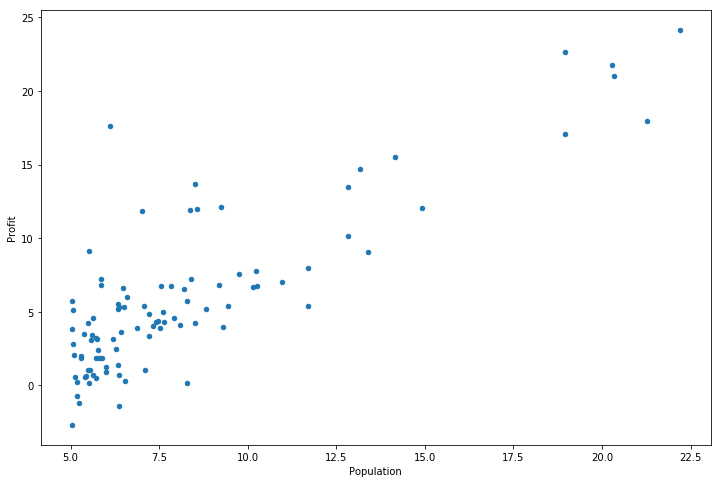

In [110]:
#visualize data
pd_data.plot(kind='scatter', x='Population', y='Profit', figsize=(12,8))

### implement Simple Linear Regression

In [111]:
pd_data.insert(0, 'Ones', 1)
# set X (training data) and y (target variable)
cols = pd_data.shape[1]  
X = pd_data.iloc[:,0:cols-1]  
y = pd_data.iloc[:,cols-1:cols] 

In [112]:
# convert from data frames to numpy matrices
X = np.matrix(X.values)  
y = np.matrix(y.values)  
#theta = np.matrix(np.zeros((2,1)))
theta = np.matrix(np.zeros((1,2)))

iterations = 1500;
alpha = 0.01;

In [115]:
def computeCost(X, y, theta):
    inner = np.power(((X* theta.T) - y),2)
    return np.sum(inner)/(2*len(X))

In [116]:
computeCost(X, y, theta)

32.072733877455676

In [117]:
X.shape, y.shape, theta.shape

((97, 2), (97, 1), (1, 2))

In [118]:
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    for i in range(iters):
        error = (X*theta.T) - y
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))

        theta = temp
        cost[i] = computeCost(X, y, theta)

    return theta, cost

In [119]:
gradientDescent(X, y, theta, alpha, iterations)

(matrix([[-3.63029144,  1.16636235]]),
 array([6.73719046, 5.93159357, 5.90115471, ..., 4.48343473, 4.48341145,
        4.48338826]))

In [136]:
def gradientDescent(X, y, theta, alpha, iters):
    cost = np.zeros(iters)
    m = len(X)
    for i in range(iters):
        # Hypothesis Values
        h = X.dot(theta.T)
        # Difference b/w Hypothesis and Actual Y
        error = h - y
        # Gradient Calculation
        gradient = X.T.dot(error) / m
        # Changing Values of B using Gradient
        theta = theta - alpha * gradient
        # New Cost Value
        cost[i] = computeCost(X, y, theta)
        
        #error = (X*theta.T) - y
        #term = np.multiply(error, X)
        #theta = theta - ((alpha / len(X)) * np.sum(term))
        #cost[i] = computeCost(X, y, theta)

    return theta, cost

In [137]:
g, cost = gradientDescent(X, y, theta, alpha, iterations)

In [130]:
computeCost(X, y, g)  

2.8667481746492072e+50

Text(0.5,1,'Predicted Profit vs. Population Size')

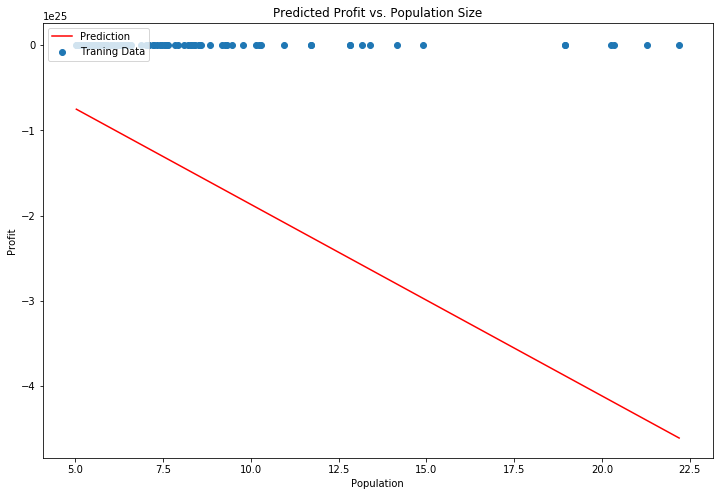

In [131]:
x = np.linspace(pd_data.Population.min(), pd_data.Population.max(), 100)  
f = g[0, 0] + (g[0, 1] * x)

fig, ax = plt.subplots(figsize=(12,8))  
ax.plot(x, f, 'r', label='Prediction')  
ax.scatter(pd_data.Population, pd_data.Profit, label='Traning Data')  
ax.legend(loc=2)  
ax.set_xlabel('Population')  
ax.set_ylabel('Profit')  
ax.set_title('Predicted Profit vs. Population Size') 

Text(0.5,1,'Error vs. Training Epoch')

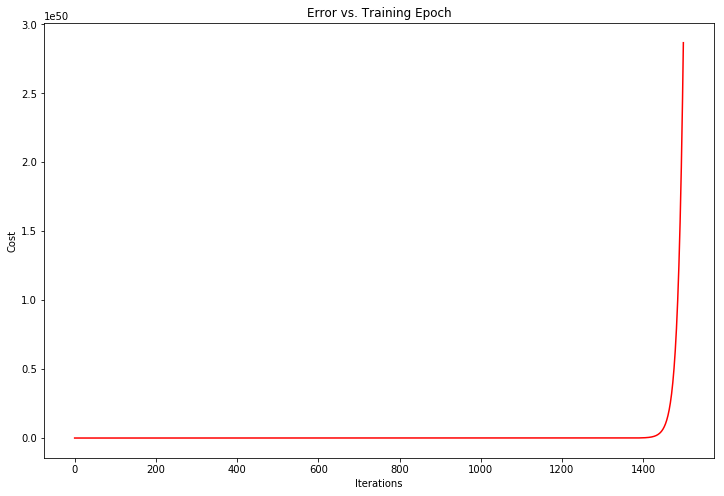

In [132]:
fig, ax = plt.subplots(figsize=(12,8))  
ax.plot(np.arange(iterations), cost, 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch') 